create restaurants table

In [1]:
import sqlite3
from database.database_helper import create_restaurants_table
db_connection = sqlite3.connect('hometimeABM_database.db')
create_restaurants_table(db_connection)

In [2]:
from database.database_helper import add_restaurant
add_restaurant(db_connection, 'Big Burger House', 69.69, 69.69)
add_restaurant(db_connection, 'Fabulous Fish n chips', 33.33, 33.33)
add_restaurant(db_connection, 'Cheesy does it', 75.00, 65.00)
add_restaurant(db_connection, 'Pizza Perfection', 25.00, 15.50)
add_restaurant(db_connection, 'Ace Cafe', 95.00, 50.00)

In [3]:
from database.database_helper import get_all_restaurants
get_all_restaurants(db_connection)

[('Big Burger House', 69.69, 69.69),
 ('Fabulous Fish n chips', 33.33, 33.33),
 ('Cheesy does it', 75.0, 65.0),
 ('Pizza Perfection', 25.0, 15.5),
 ('Ace Cafe', 95.0, 50.0)]

This is an initial run of our model

In [4]:
from model.model import HometimeModel

model = HometimeModel(db_connection)
for i in range(0, 100):
    model.step()

0's utility is 0.6594137286288252
70's utility is 1.1021052674114498
70's utility is 0.5562850385976675
70's utility is 2.4160705530125552
61 stage one
61's utility is 0.762232641750235
61's utility is 0.9975099030736355
61's utility is 1.3096917772736054
61's utility is 3.0214189674485676
61's utility is 1.1650888423362022
38 stage one
38's utility is 2.00949497831023
38's utility is 0.5414199202825969
38's utility is 0.5772368897092554
38's utility is 0.2171149403066839
38's utility is 0.4075786759726703
14 stage one
14's utility is 1.8702066139482172
14's utility is 0.4065068860679131
14's utility is 0.5719474324923561
14's utility is 0.230900142580599
14's utility is 0.06169307216588543
15 stage one
15's utility is 0.9091939632593682
15's utility is 0.7475795912562337
15's utility is 0.9189957088702451
15's utility is 0.6948394426241182
15's utility is 2.342936118581618
96 stage one
96's utility is 0.19720055817360227
96's utility is 2.716238832650089
96's utility is 0.200923025099

In [5]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
agent_vars.head()

Last Choice
Step AgentID            
0    0              None
     1              None
     2              None
     3              None
     4              None

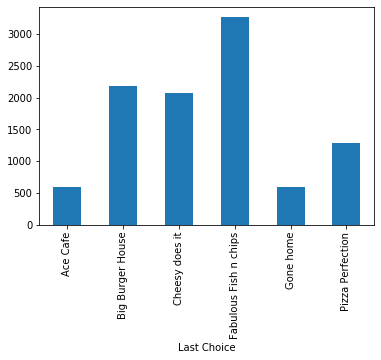

In [6]:
agent_vars.fillna('Gone home').groupby('Last Choice').size().plot.bar()

In [7]:
model_vars = model.datacollector.get_model_vars_dataframe()
model_vars.head()

,Good weather
0,True
1,True
2,True
3,True
4,False


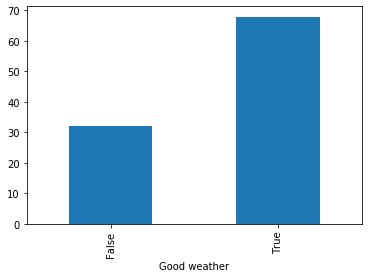

In [9]:
model_vars.groupby('Good weather').size().plot.bar()

In [8]:
agent_vars.to_csv("agent.csv")
model_vars.to_csv("model.csv")

In [12]:
agent_vars.to_sql("agents_results", db_connection, if_exists="replace", index_label=["day", "agent_id"])
model_vars.to_sql("model_results", db_connection, if_exists="replace", index_label="day")